# 02_Visualization

In this notebook, we focus on visualizing various aspects of our dataset to gain better insights and understand the relationships between different features. This analysis complements the previous exploratory data analysis (EDA) done in `01_EDA.ipynb`.

We will explore a variety of visualization techniques to highlight key patterns and trends in the data, such as:

1. **Distributions of Numerical Features**: Understanding the distribution of individual numerical features using histograms and KDE plots.
2. **Correlation Heatmap**: Identifying correlations between features to see how they influence each other.
3. **Pair Plots**: Examining pairwise relationships between multiple features.
4. **Box Plots**: Comparing the distribution of numerical features across different categories.
5. **Count Plots**: Visualizing the frequency of different categories in categorical features.
6. **Scatter Plots with Regression Lines**: Exploring relationships between pairs of numerical features with trend lines.
7. **Violin Plots**: Combining aspects of box plots and KDE plots to show distributions of numerical data across different categories.

By examining these visualizations, we aim to uncover patterns that could inform our modeling process, help in making data-driven decisions, and generate hypotheses for further analysis. These insights will be instrumental in guiding the next steps of our data analysis and modeling process.


In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Setting visualisation style
sns.set(style="whitegrid")

# Load the final DataFrame from EDA.ipynb
df = pd.read_pickle('../data/final_df.pkl')
df.head()

,serviceCharge,heatingType,newlyConst,balcony,pricetrend,totalRent,yearConstructed,firingTypes,hasKitchen,cellar,livingSpace,condition,lift,typeOfFlat,geo_plz,noRooms,floor,garden
0,245.0,Central Heating,False,False,4.62,840.00,1965.0,Oil,False,True,86.00,well_kept,False,ground_floor,44269,4.0,1.0,True
2,255.0,Electric Heating,True,True,2.72,1300.00,2019.0,Other_imputed,False,True,83.80,first_time_use,True,apartment,1097,3.0,3.0,False
4,138.0,Central Heating,False,True,2.46,903.00,1950.0,Gas,False,False,84.97,refurbished,False,apartment,28213,3.0,1.0,False
6,70.0,Central Heating,False,False,1.01,380.00,1941.0,Other_imputed,False,True,62.00,fully_renovated,False,Other_imputed,9599,2.0,1.0,True
7,88.0,Central Heating,False,True,1.89,584.25,1959.0,Gas,False,True,60.30,Other,False,ground_floor,28717,3.0,2.0,False


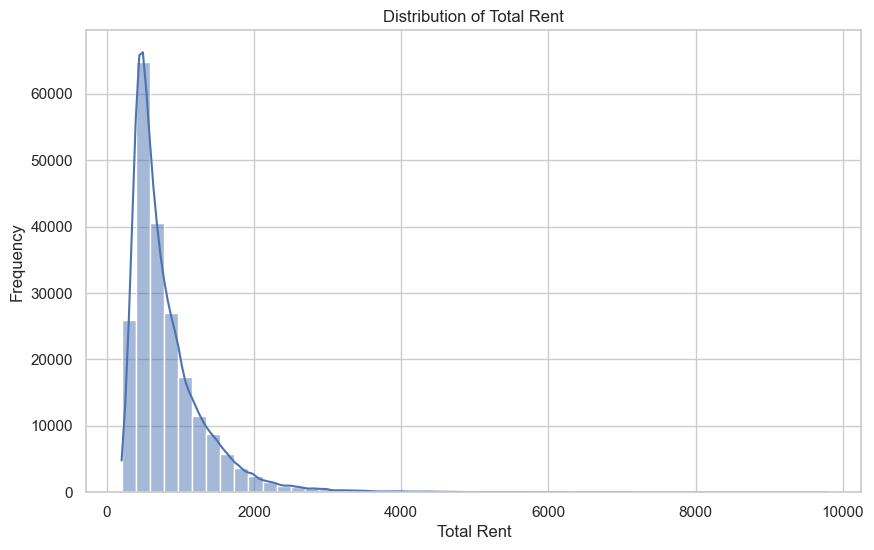

In [4]:
# Distribution of Total Rent
plt.figure(figsize=(10, 6))
sns.histplot(df['totalRent'], bins=50, kde=True)
plt.title('Distribution of Total Rent')
plt.xlabel('Total Rent')
plt.ylabel('Frequency')
plt.show()

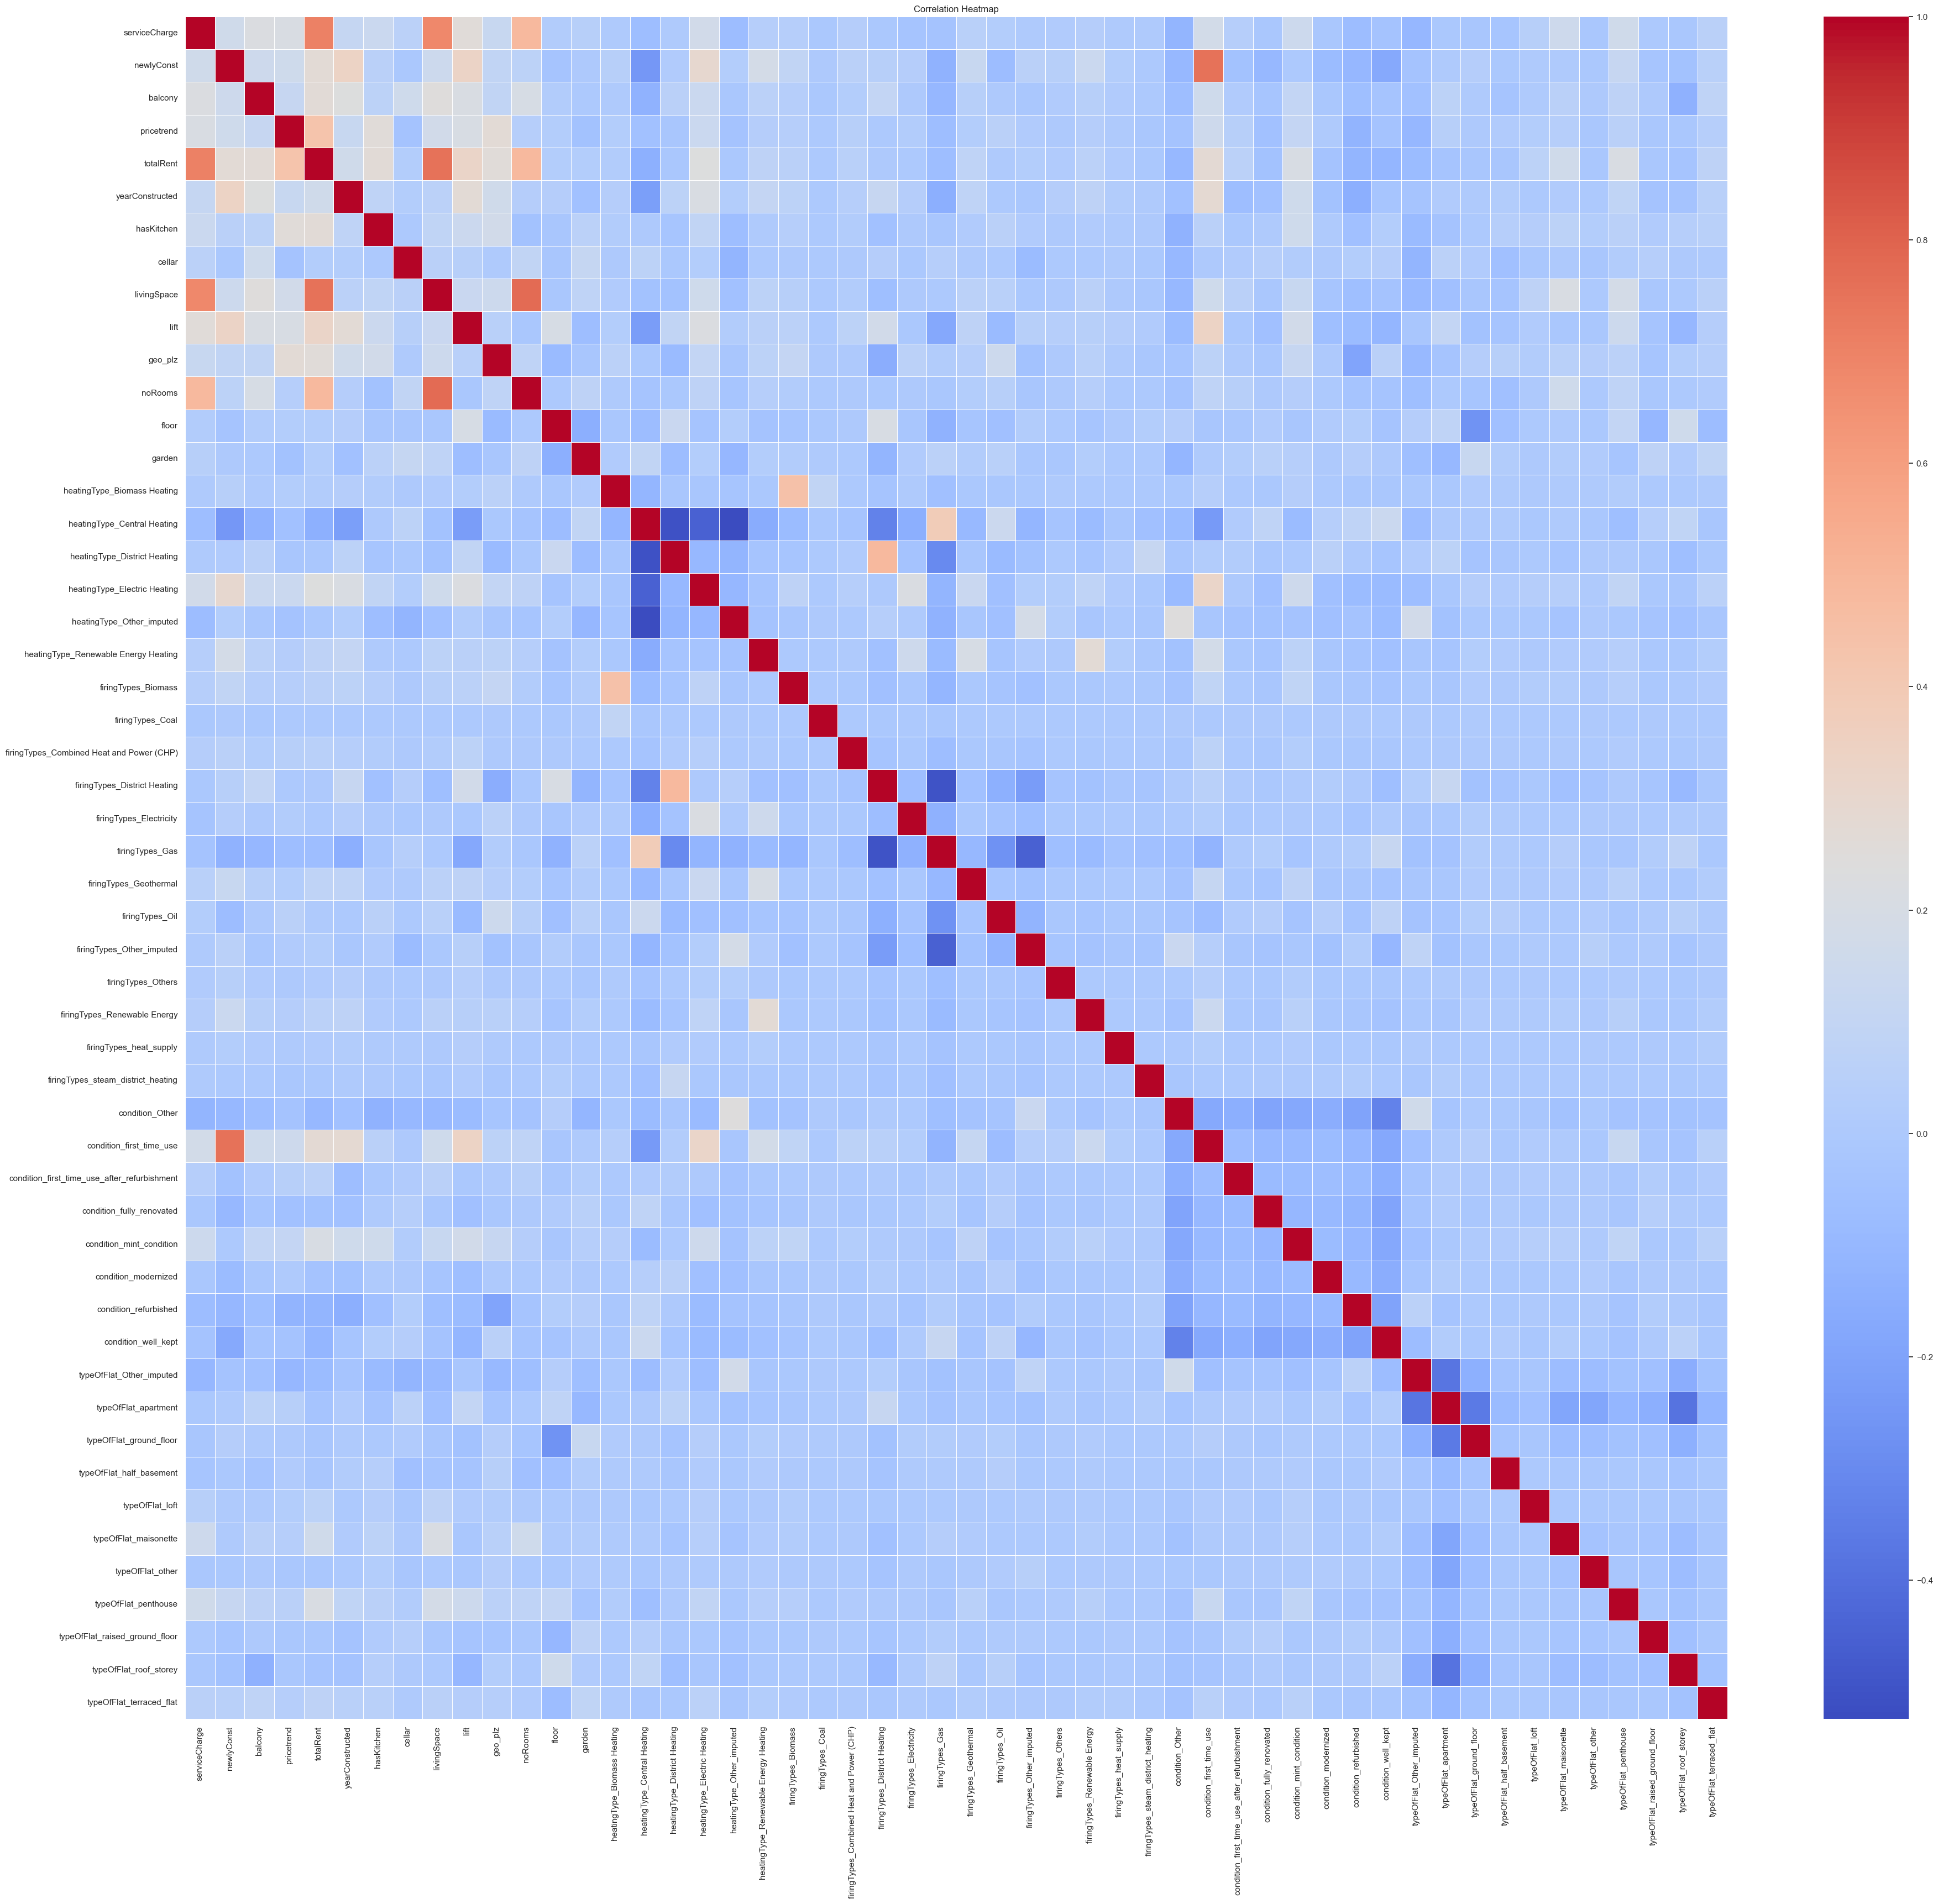

In [63]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['heatingType', 'firingTypes', 'condition', 'typeOfFlat'])

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(45, 40))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

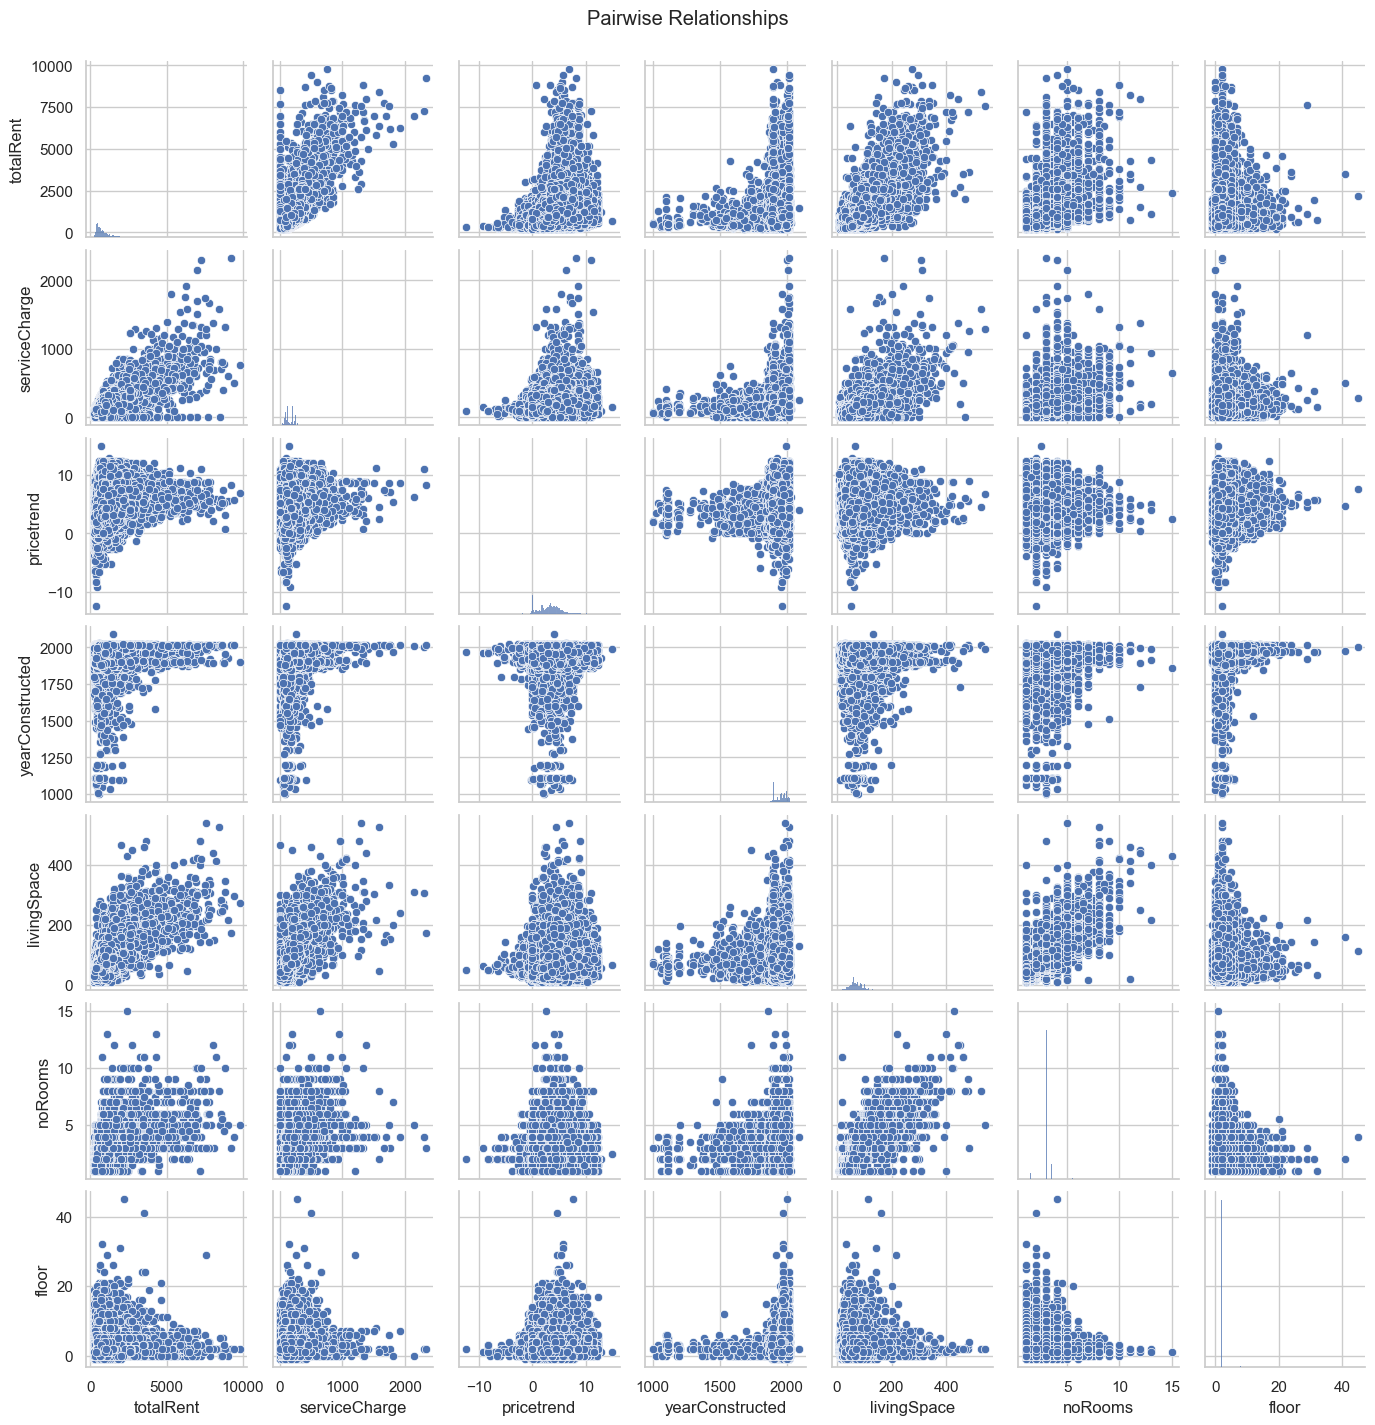

In [64]:
# Pair Plot
sns.pairplot(df, vars=['totalRent', 'serviceCharge', 'pricetrend', 'yearConstructed', 'livingSpace', 'noRooms', 'floor'], height=2)
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


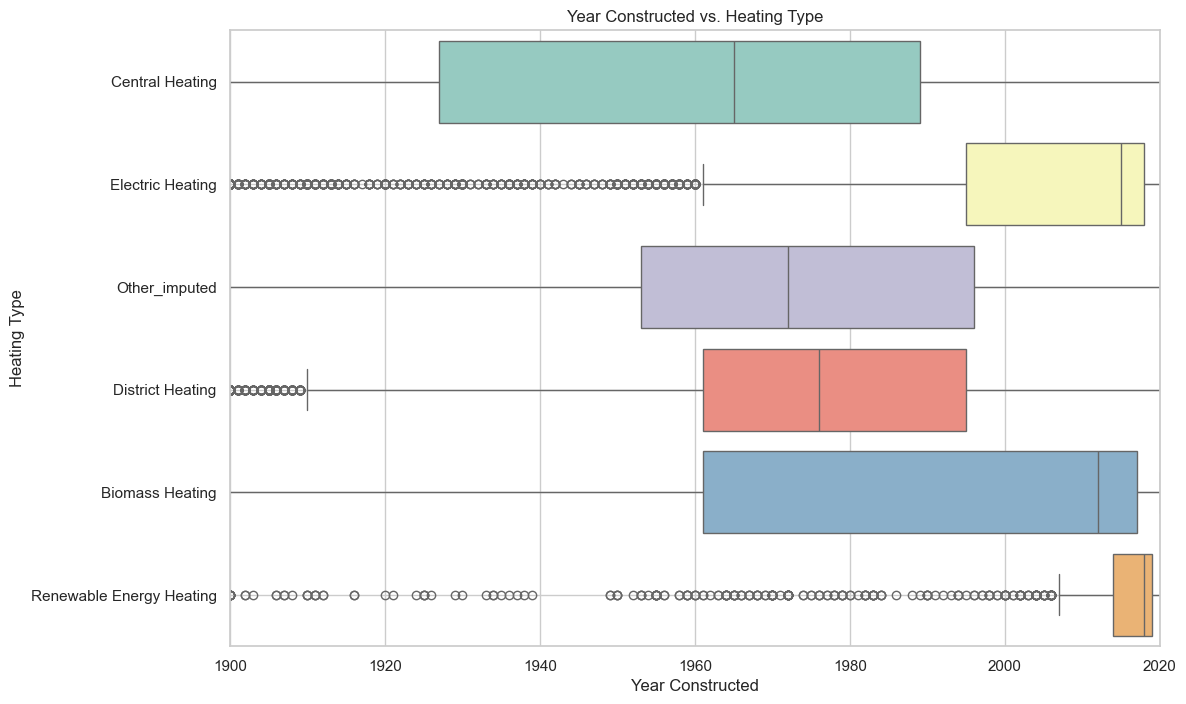

In [65]:
# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='yearConstructed', y='heatingType', data=df, hue='heatingType', palette="Set3", legend=False)

# Set plot title and labels
plt.title('Year Constructed vs. Heating Type')
plt.xlabel('Year Constructed')
plt.ylabel('Heating Type')

# Set x-axis limits
plt.xlim(1900, 2020)

# Show plot
plt.grid(True)
plt.show()

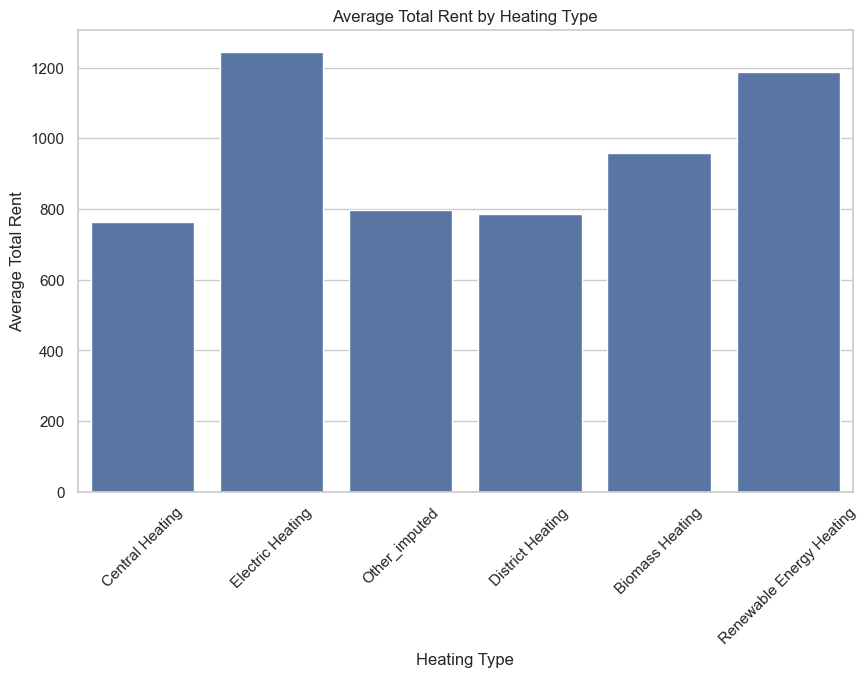

In [66]:
# Bar Plot for Heating Type
plt.figure(figsize=(10, 6))
sns.barplot(x='heatingType', y='totalRent', data=df, errorbar=None)
plt.title('Average Total Rent by Heating Type')
plt.xlabel('Heating Type')
plt.ylabel('Average Total Rent')
plt.xticks(rotation=45)
plt.show()

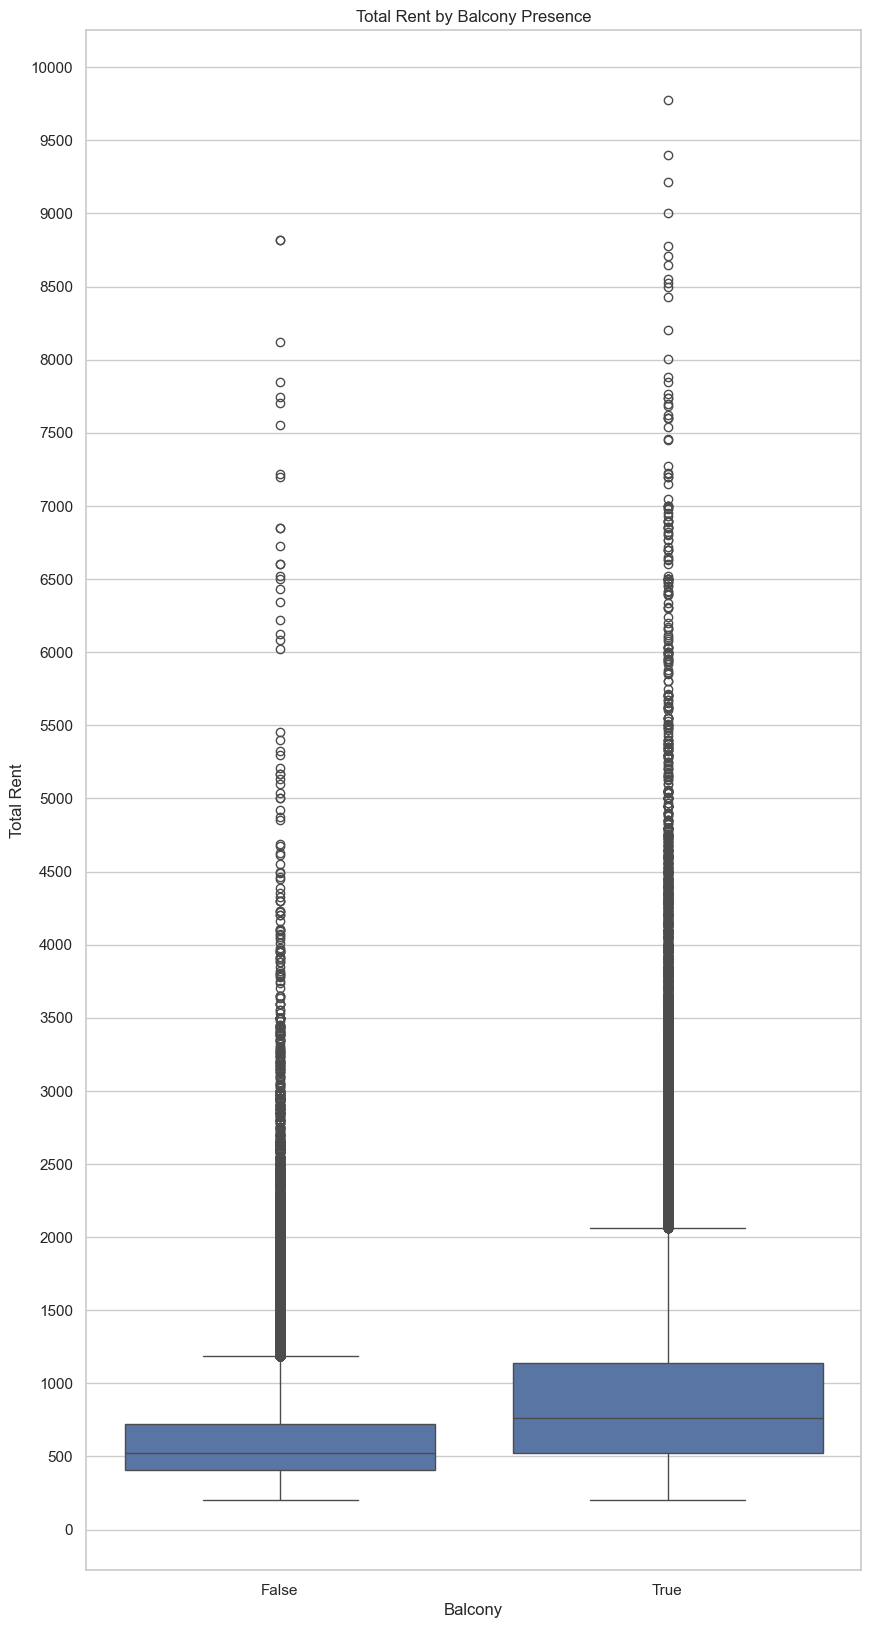

In [67]:
plt.figure(figsize=(10, 20))
sns.boxplot(x='balcony', y='totalRent', data=df)
plt.title('Total Rent by Balcony Presence')
plt.xlabel('Balcony')
plt.ylabel('Total Rent')
plt.yticks(range(0, int(df['totalRent'].max()) + 500, 500))
plt.show()

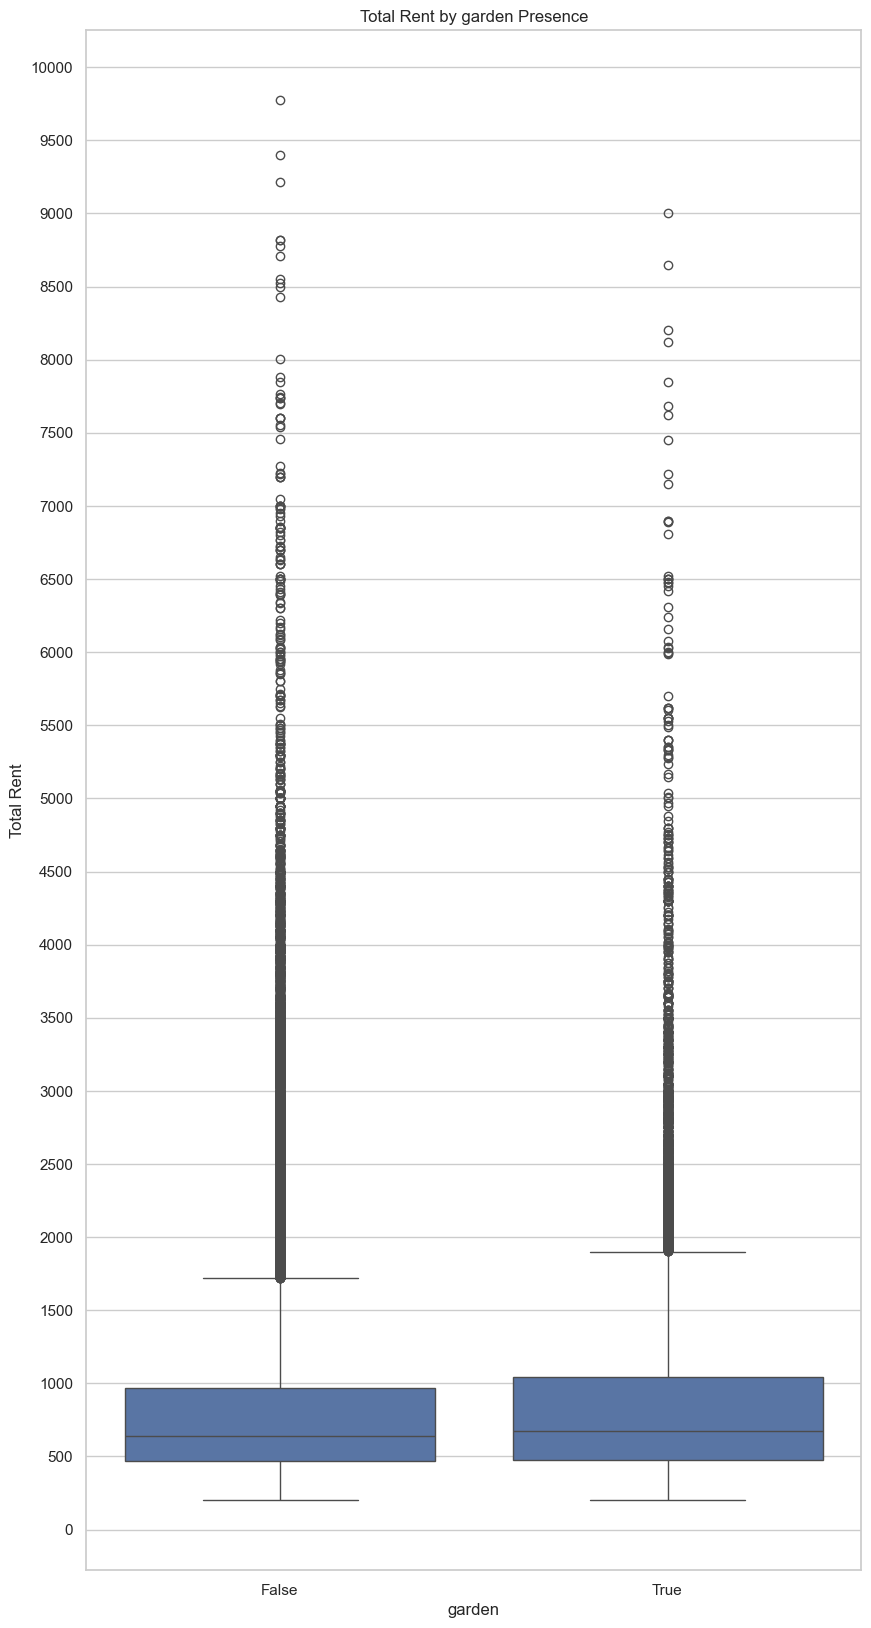

In [78]:
plt.figure(figsize=(10, 20))
sns.boxplot(x='garden', y='totalRent', data=df)
plt.title('Total Rent by garden Presence')
plt.xlabel('garden')
plt.ylabel('Total Rent')
plt.yticks(range(0, int(df['totalRent'].max()) + 500, 500))
plt.show()

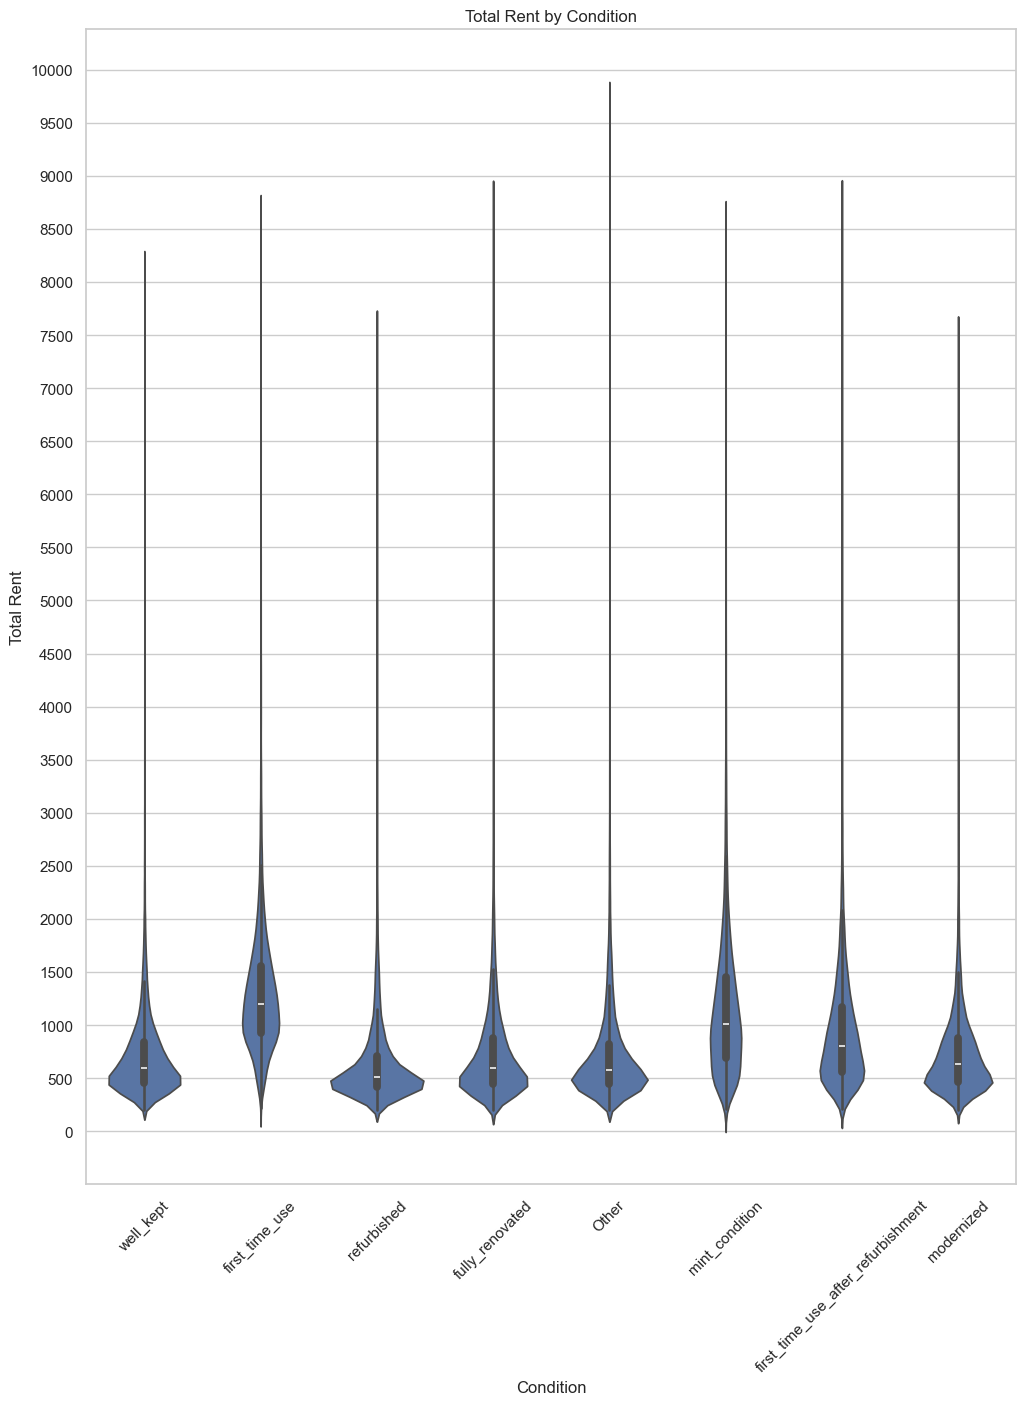

In [68]:
# Violin Plot for Condition
plt.figure(figsize=(12, 15))
sns.violinplot(x='condition', y='totalRent', data=df)
plt.title('Total Rent by Condition')
plt.xlabel('Condition')
plt.ylabel('Total Rent')
plt.xticks(rotation=45)
plt.yticks(range(0, int(df['totalRent'].max()) + 500, 500))
plt.show()

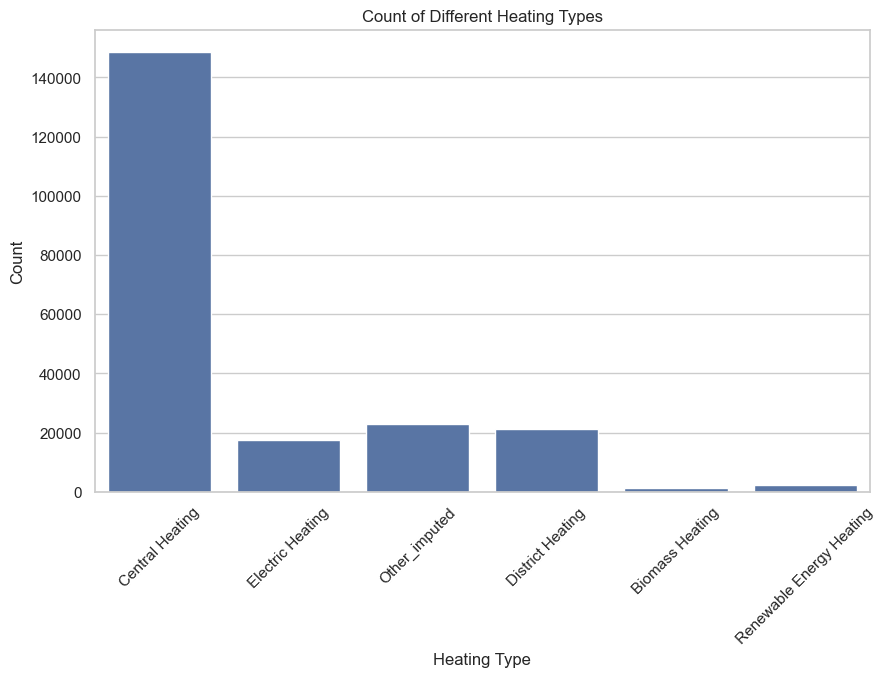

In [69]:
# Count Plots for Categorical Features
plt.figure(figsize=(10, 6))
sns.countplot(x='heatingType', data=df)
plt.title('Count of Different Heating Types')
plt.xlabel('Heating Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

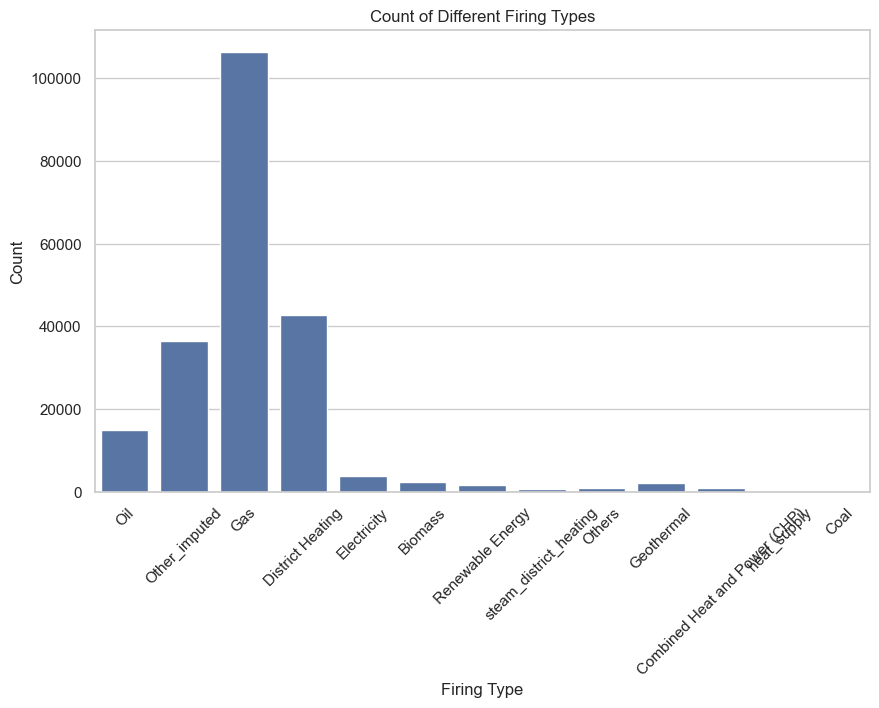

In [70]:
# Count Plots for Categorical Features
plt.figure(figsize=(10, 6))
sns.countplot(x='firingTypes', data=df)
plt.title('Count of Different Firing Types')
plt.xlabel('Firing Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

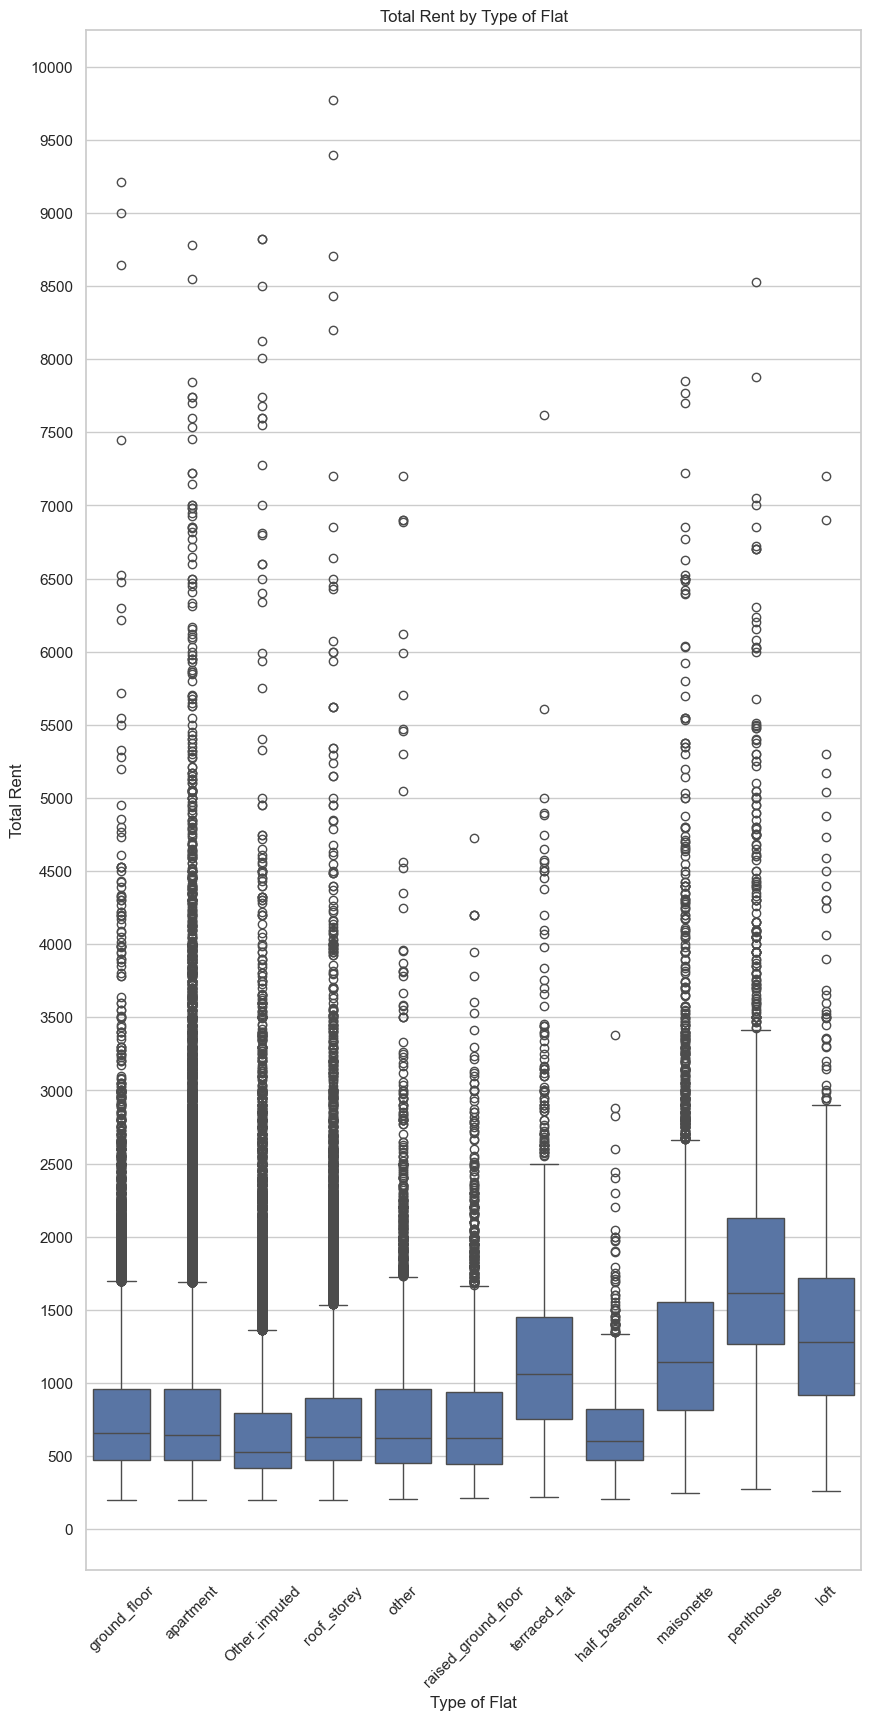

In [71]:
# Box Plot for Multiple Categories
plt.figure(figsize=(10, 20))
sns.boxplot(x='typeOfFlat', y='totalRent', data=df)
plt.title('Total Rent by Type of Flat')
plt.xlabel('Type of Flat')
plt.ylabel('Total Rent')
plt.xticks(rotation=45)
plt.yticks(range(0, int(df['totalRent'].max()) + 500, 500))
plt.show()

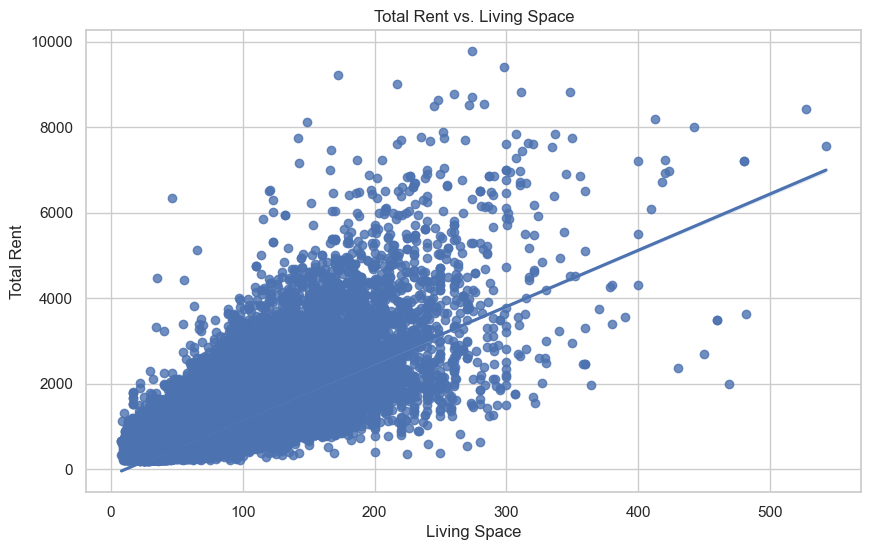

In [72]:
# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x='livingSpace', y='totalRent', data=df)
plt.title('Total Rent vs. Living Space')
plt.xlabel('Living Space')
plt.ylabel('Total Rent')
plt.show()

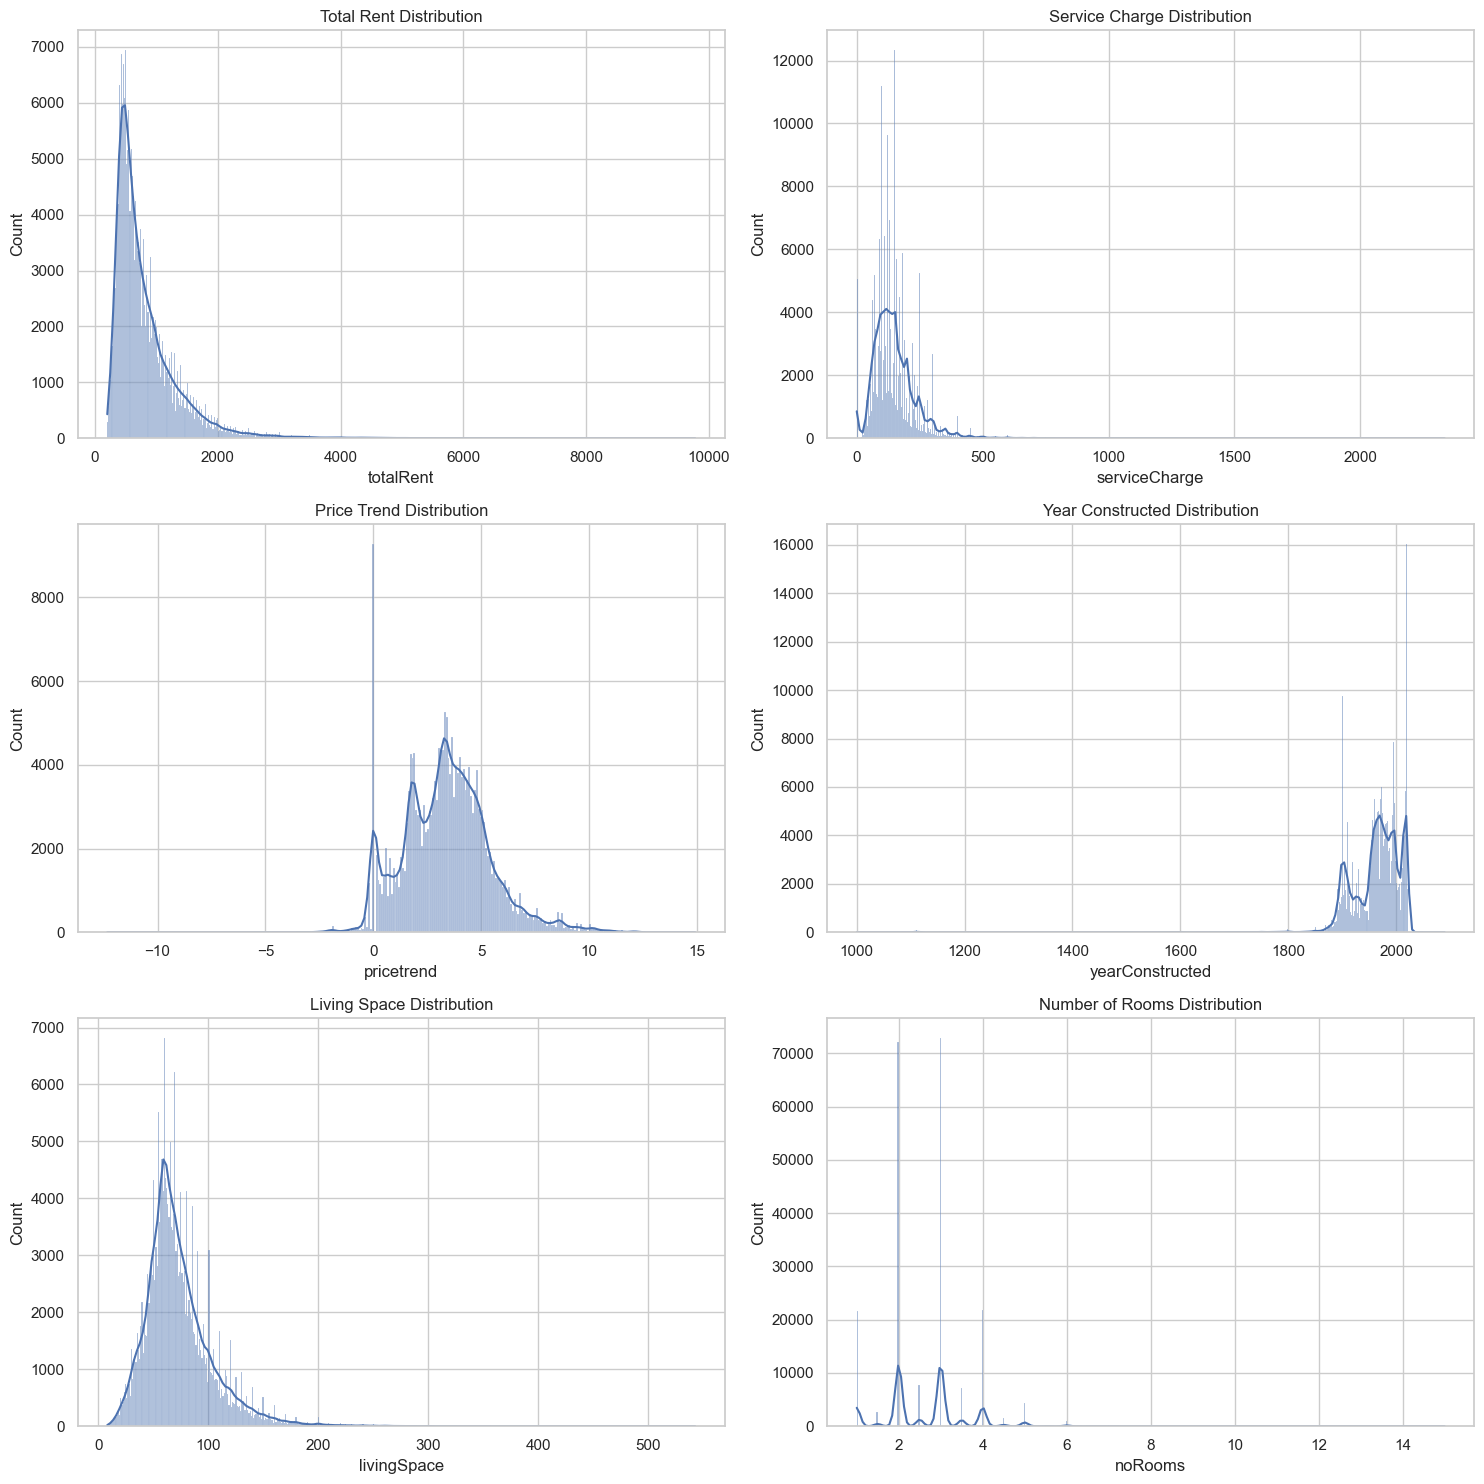

In [73]:
# Distribution Plot for Each Categorical Feature
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.histplot(df['totalRent'], kde=True, ax=axes[0, 0])
sns.histplot(df['serviceCharge'], kde=True, ax=axes[0, 1])
sns.histplot(df['pricetrend'], kde=True, ax=axes[1, 0])
sns.histplot(df['yearConstructed'], kde=True, ax=axes[1, 1])
sns.histplot(df['livingSpace'], kde=True, ax=axes[2, 0])
sns.histplot(df['noRooms'], kde=True, ax=axes[2, 1])

axes[0, 0].set_title('Total Rent Distribution')
axes[0, 1].set_title('Service Charge Distribution')
axes[1, 0].set_title('Price Trend Distribution')
axes[1, 1].set_title('Year Constructed Distribution')
axes[2, 0].set_title('Living Space Distribution')
axes[2, 1].set_title('Number of Rooms Distribution')

plt.tight_layout()
plt.show()

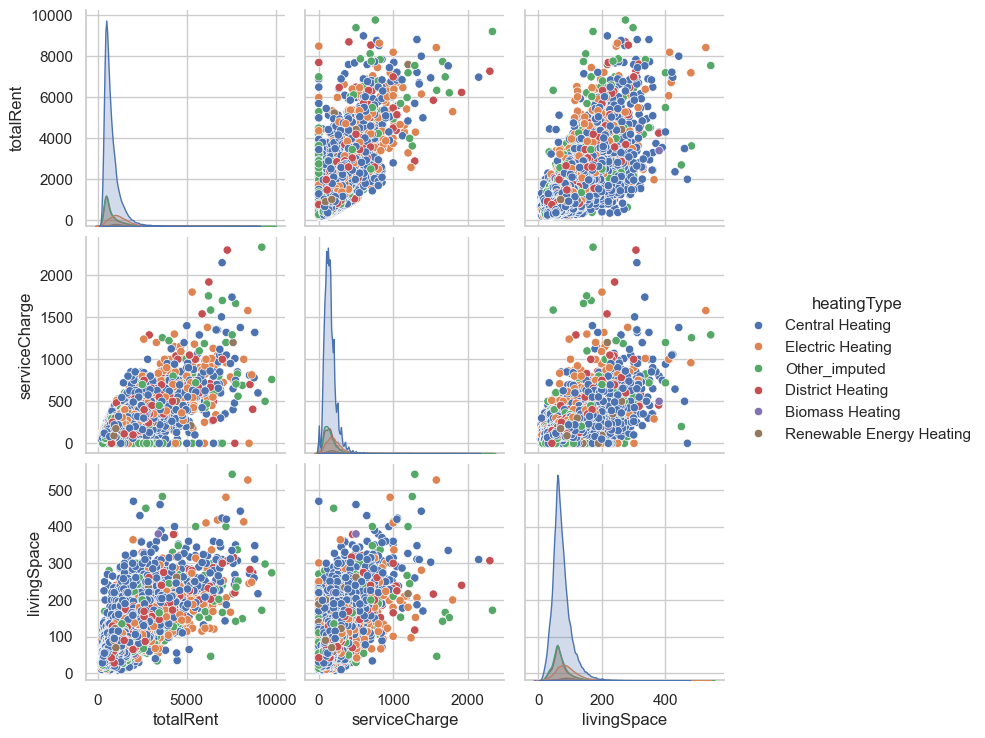

In [74]:
# Pair Plots Including Categorical Features
sns.pairplot(df, hue='heatingType', vars=['totalRent', 'serviceCharge', 'livingSpace'])
plt.show()

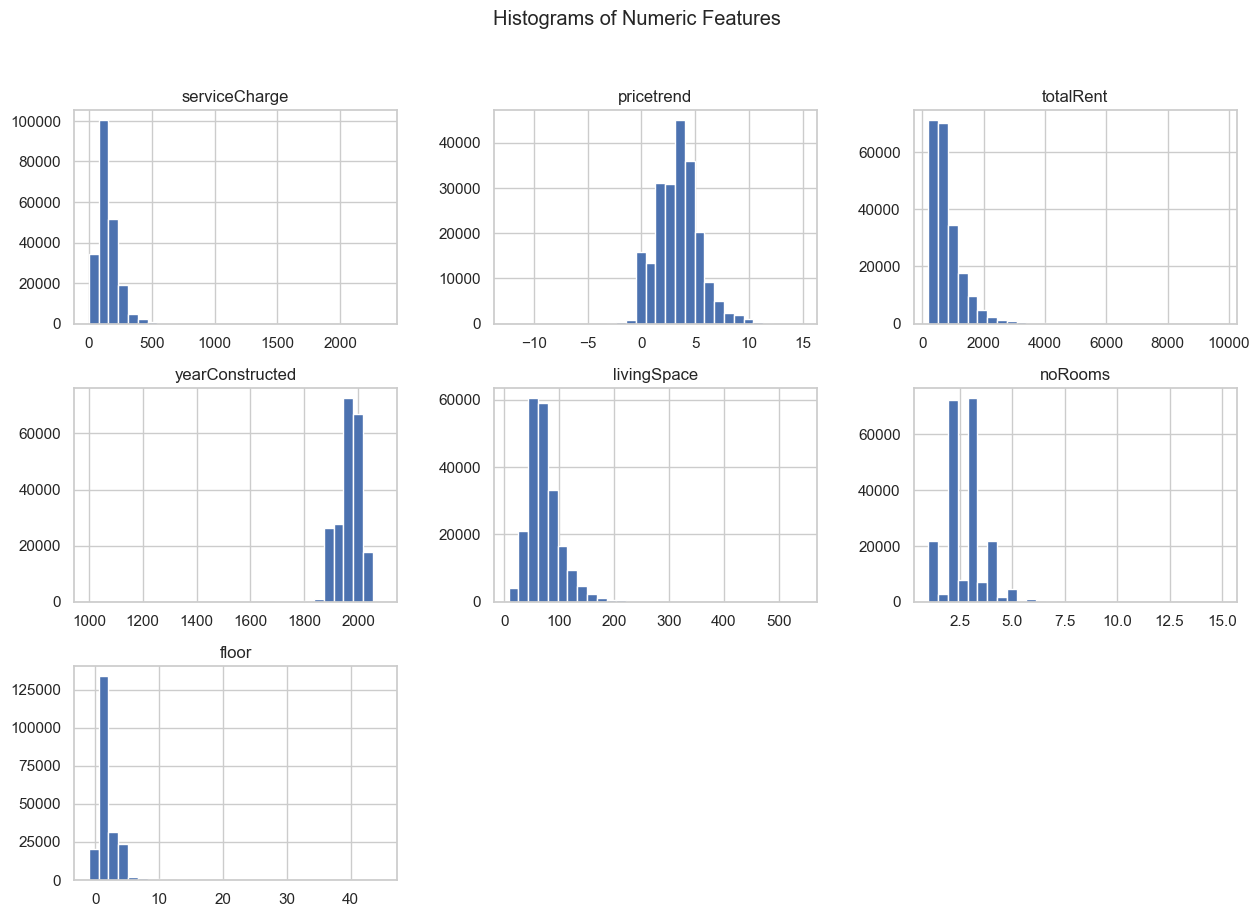

In [75]:
# Histogram of Numeric Features
numeric_features = ['serviceCharge', 'pricetrend', 'totalRent', 'yearConstructed', 'livingSpace', 'noRooms', 'floor']
df[numeric_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Features')
plt.show()

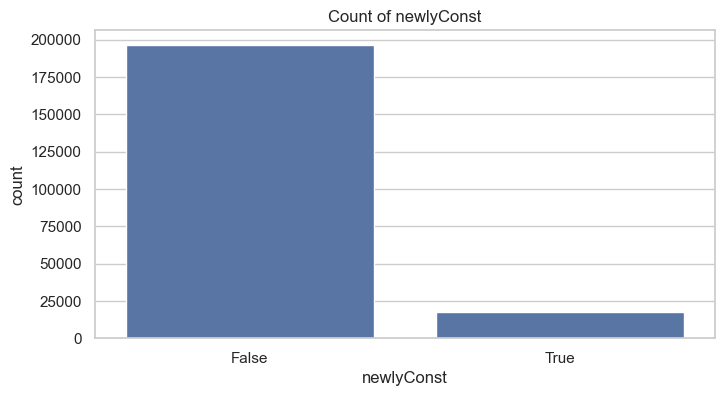

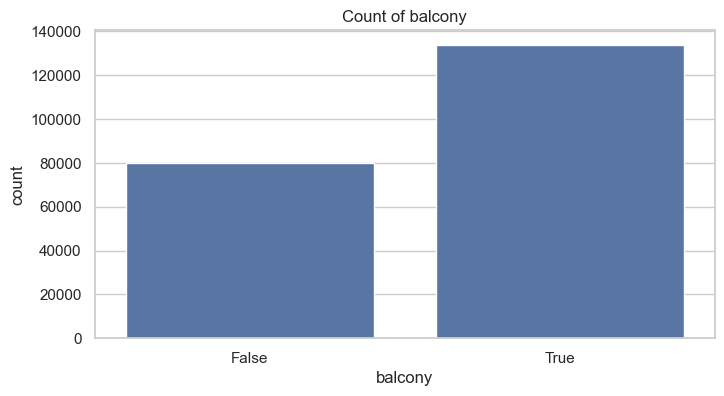

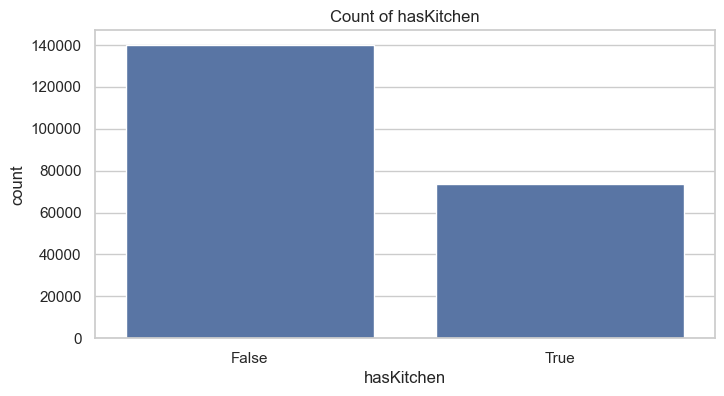

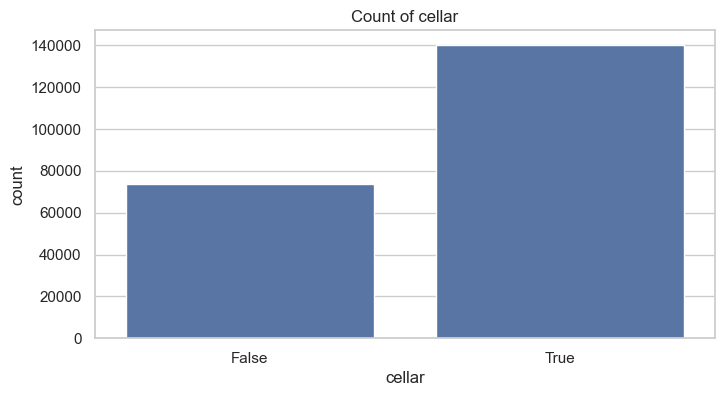

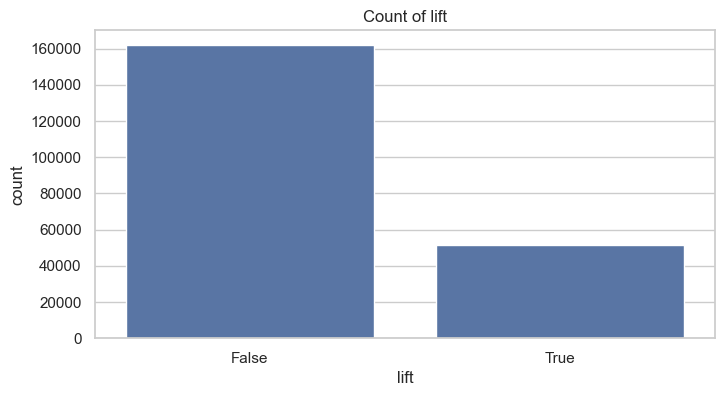

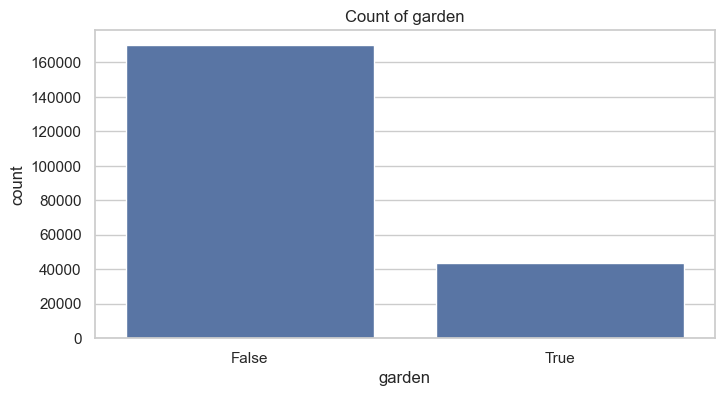

In [76]:
# Bar Plot for Boolean Features
boolean_features = ['newlyConst', 'balcony', 'hasKitchen', 'cellar', 'lift', 'garden']
for feature in boolean_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
    plt.show()

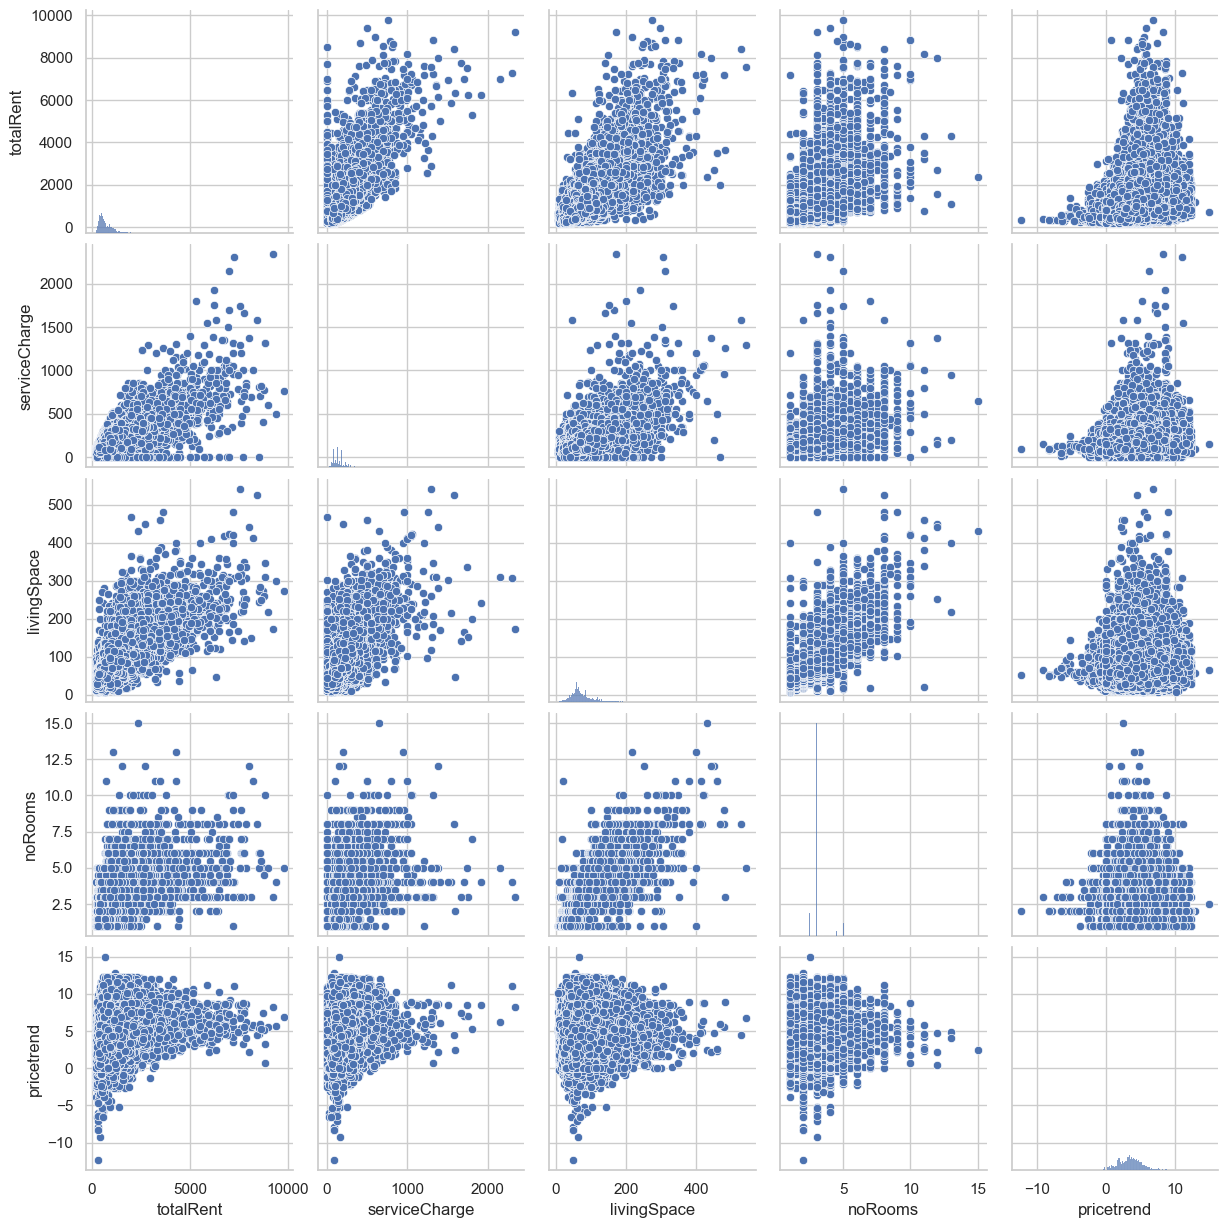

In [77]:
# Pair Plot for Feature Relationships

sns.pairplot(df, vars=['totalRent', 'serviceCharge', 'livingSpace', 'noRooms', 'pricetrend'])
plt.show()